## Import Library

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
# import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice
%matplotlib inline

## Read Data

In [96]:
df = pd.read_csv("../Dataset/AirQuality.csv", delimiter=";")
df.shape

(9471, 17)

In [97]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [98]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

## Membersihkan Data

In [99]:
df = df.dropna(axis=0, how='all')  # untuk menghapus baris jika semua adalanya nan
df = df.dropna(axis=1, how='all')   # untuk menghapus kolom jika semua isinya adalah nan
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [100]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [101]:
df.shape

(9357, 15)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [103]:
df['T'] = pd.to_numeric(df['T'].str.replace(',', '.'))
df['AH'] = pd.to_numeric(df['AH'].str.replace(',', '.'))
df['RH'] = pd.to_numeric(df['RH'].str.replace(',', '.'))
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'].str.replace(',', '.'))
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'].str.replace(',', '.'))

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [105]:
df['Date'].unique()

array(['10/03/2004', '11/03/2004', '12/03/2004', '13/03/2004',
       '14/03/2004', '15/03/2004', '16/03/2004', '17/03/2004',
       '18/03/2004', '19/03/2004', '20/03/2004', '21/03/2004',
       '22/03/2004', '23/03/2004', '24/03/2004', '25/03/2004',
       '26/03/2004', '27/03/2004', '28/03/2004', '29/03/2004',
       '30/03/2004', '31/03/2004', '01/04/2004', '02/04/2004',
       '03/04/2004', '04/04/2004', '05/04/2004', '06/04/2004',
       '07/04/2004', '08/04/2004', '09/04/2004', '10/04/2004',
       '11/04/2004', '12/04/2004', '13/04/2004', '14/04/2004',
       '15/04/2004', '16/04/2004', '17/04/2004', '18/04/2004',
       '19/04/2004', '20/04/2004', '21/04/2004', '22/04/2004',
       '23/04/2004', '24/04/2004', '25/04/2004', '26/04/2004',
       '27/04/2004', '28/04/2004', '29/04/2004', '30/04/2004',
       '01/05/2004', '02/05/2004', '03/05/2004', '04/05/2004',
       '05/05/2004', '06/05/2004', '07/05/2004', '08/05/2004',
       '09/05/2004', '10/05/2004', '11/05/2004', '12/05

In [106]:
len(df['Date'].unique())

391

In [107]:
df['Time'].unique()

array(['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00',
       '23.00.00', '00.00.00', '01.00.00', '02.00.00', '03.00.00',
       '04.00.00', '05.00.00', '06.00.00', '07.00.00', '08.00.00',
       '09.00.00', '10.00.00', '11.00.00', '12.00.00', '13.00.00',
       '14.00.00', '15.00.00', '16.00.00', '17.00.00'], dtype=object)

In [108]:
len(df['Time'].unique())

24

In [109]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [111]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [112]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


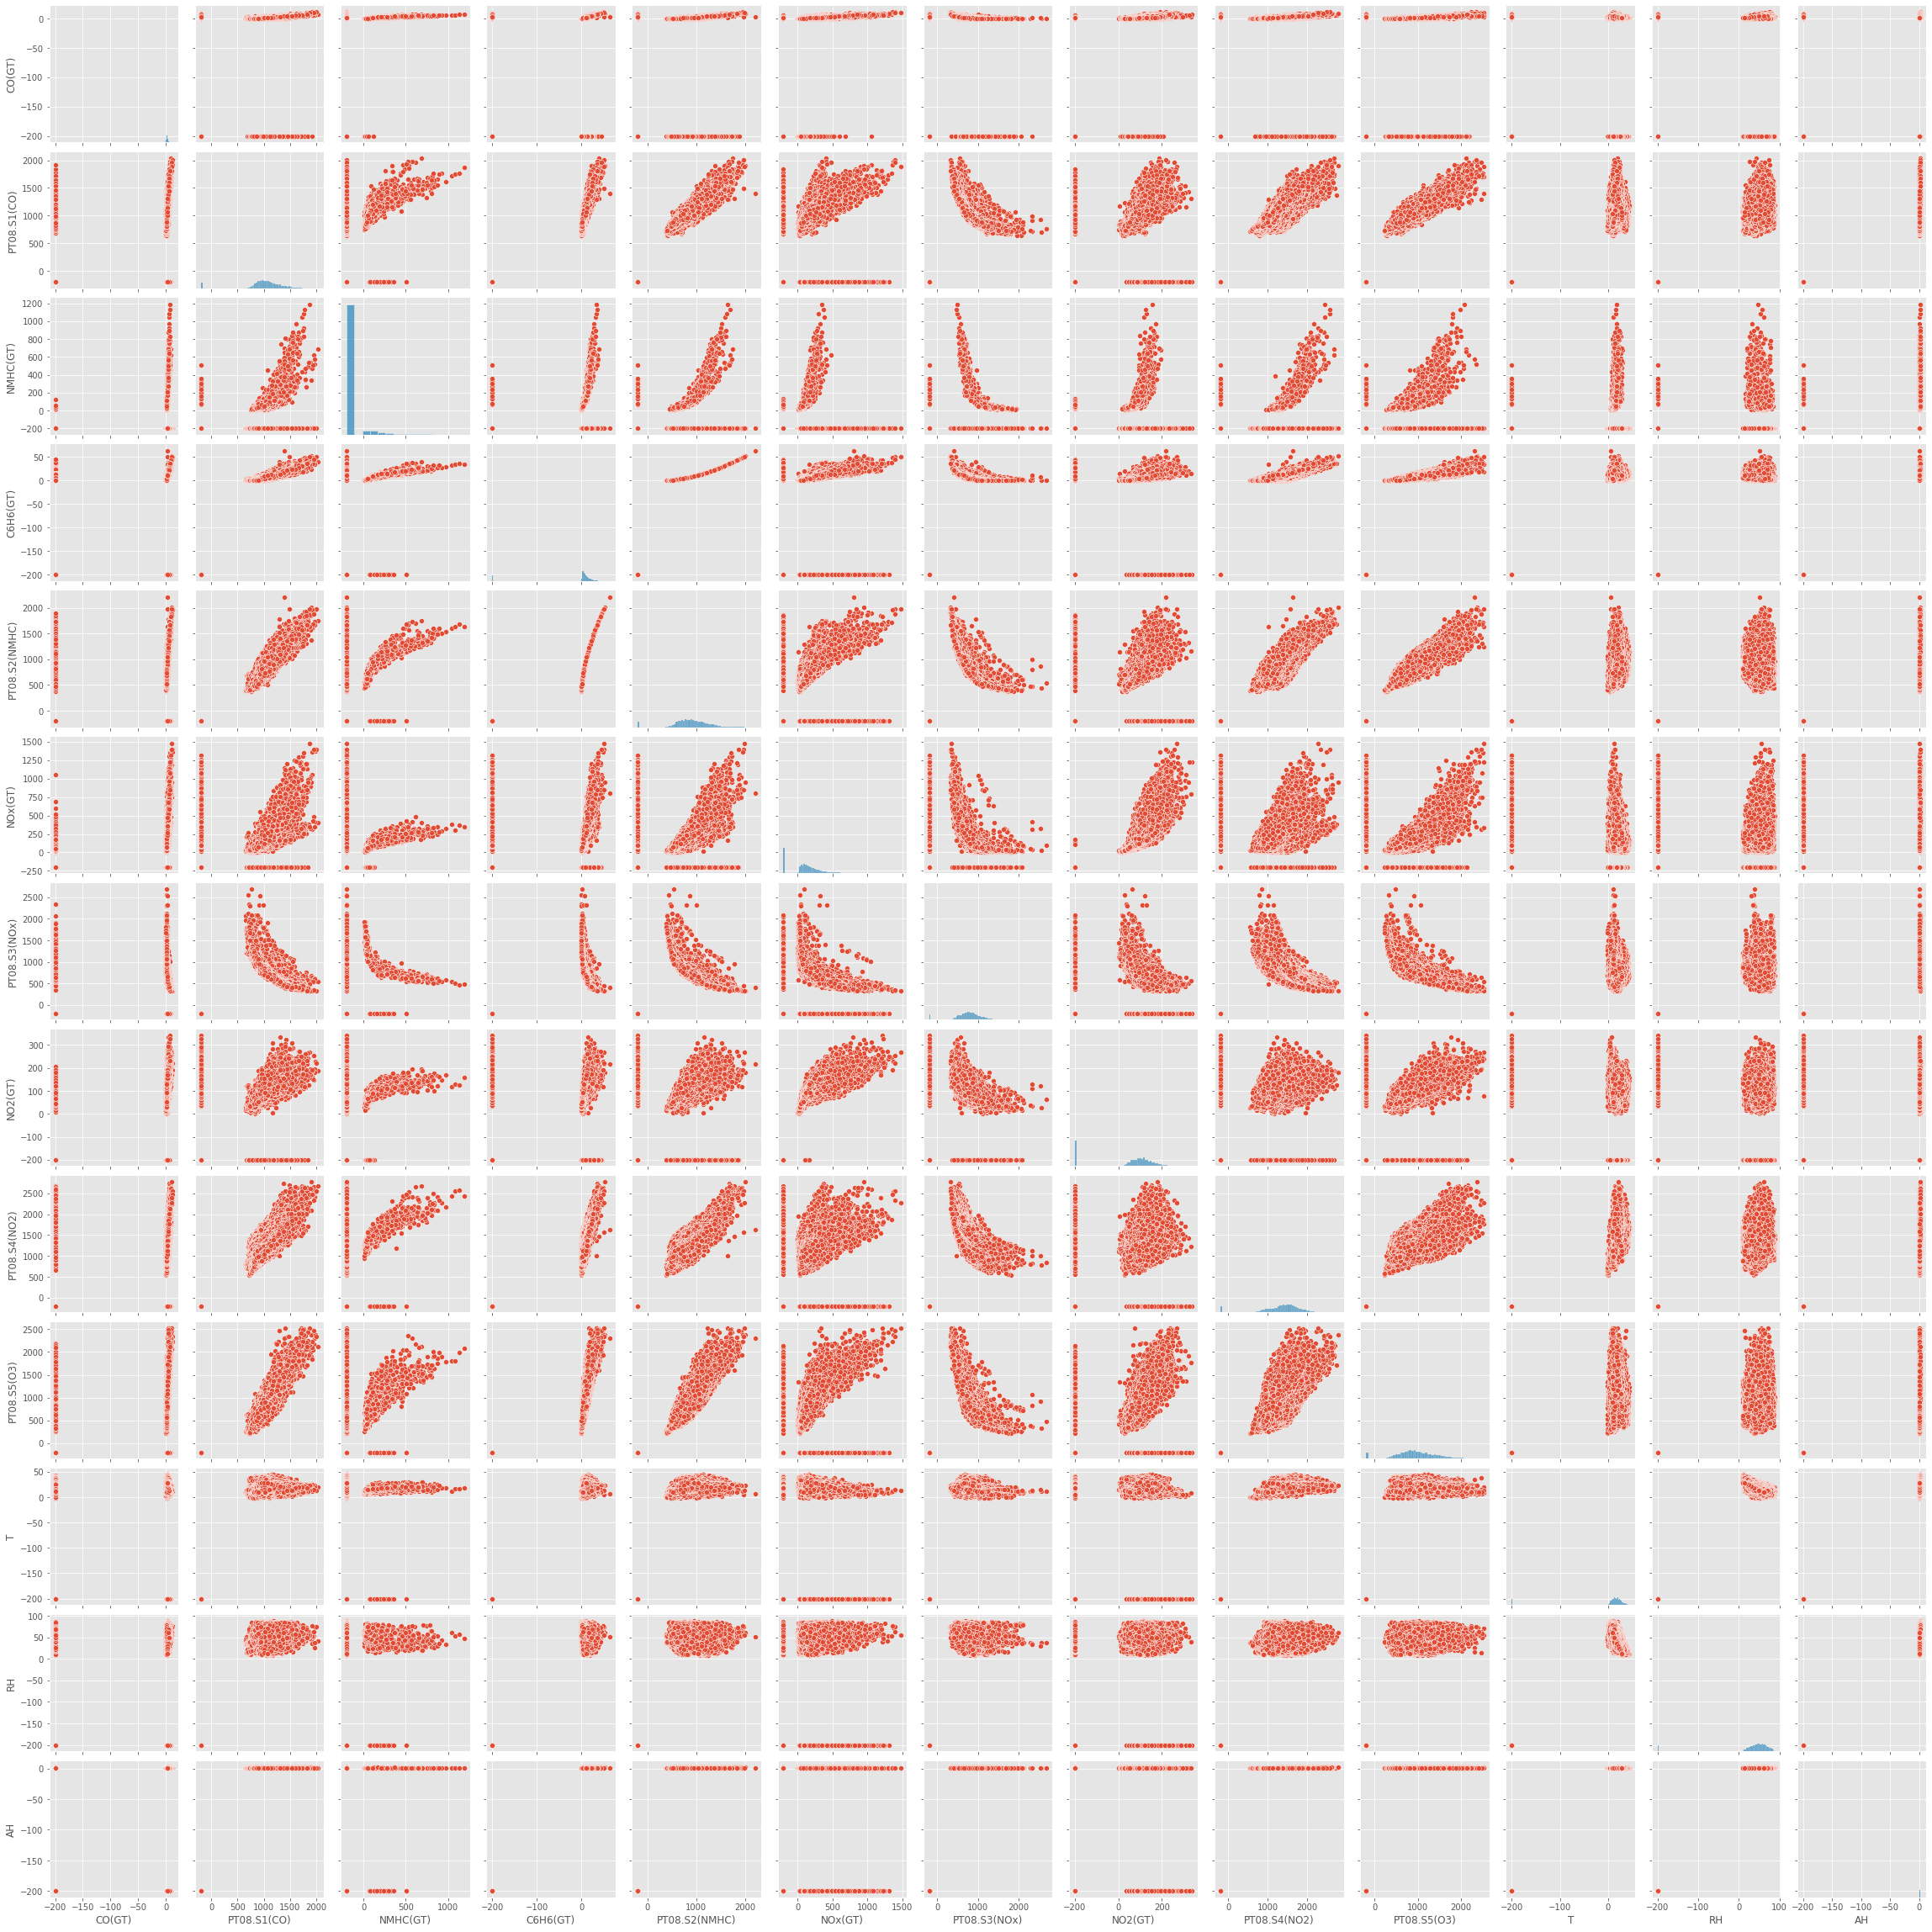

In [113]:
sns.pairplot(df)
plt.show()

## Scaling Data

In [114]:
X = df

In [115]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [116]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [117]:
cols = X.columns

In [118]:
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [119]:
X = pd.DataFrame(X, columns=[cols])
print(X)

        CO(GT) PT08.S1(CO)  NMHC(GT)  C6H6(GT) PT08.S2(NMHC)   NOx(GT)  \
0     0.956111    0.696429  0.251980  0.803565      0.516156  0.217987   
1     0.953280    0.666071  0.224622  0.794084      0.478459  0.180465   
2     0.954224    0.715179  0.207343  0.792567      0.471831  0.197141   
3     0.954224    0.703571  0.201584  0.793326      0.475559  0.221560   
4     0.951392    0.657143  0.180706  0.783087      0.429163  0.197141   
...        ...         ...       ...       ...           ...       ...   
9352  0.958471    0.675893  0.000000  0.809632      0.538940  0.400238   
9353  0.955168    0.608482  0.000000  0.801669      0.508285  0.329363   
9354  0.955168    0.599107  0.000000  0.805461      0.523198  0.293627   
9355  0.953752    0.537054  0.000000  0.794463      0.480944  0.259083   
9356  0.954224    0.567411  0.000000  0.803565      0.516570  0.276951   

     PT08.S3(NOx)   NO2(GT) PT08.S4(NO2) PT08.S5(O3)         T        RH  \
0        0.435657  0.579630     0.6

In [120]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [121]:
kmeans.cluster_centers_

array([[9.54000706e-01, 5.59920848e-01, 3.53724009e-02, 7.63114848e-01,
        4.54791181e-01, 2.56587104e-01, 3.40881061e-01, 5.51382011e-01,
        5.29083865e-01, 4.37032304e-01, 8.52026925e-01, 8.25597190e-01,
        9.51122406e-01],
       [1.63202785e-14, 5.46933357e-01, 2.46097959e-03, 7.76445893e-01,
        4.47258540e-01, 5.06466055e-02, 3.64466109e-01, 1.43696221e-01,
        5.61704240e-01, 4.06473410e-01, 8.83224045e-01, 8.47463819e-01,
        9.73554725e-01]])

In [122]:
kmeans.inertia_

2702.0395546230047

## Menentukan Jumlah Cluster Optimal dengan Elbow

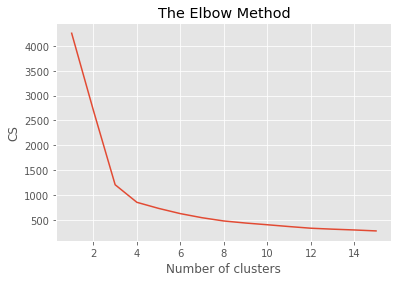

In [123]:
cs = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [124]:
n_clusters = [2,3,4,5,6]

for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 0)
    predict = cluster.fit_predict(X)
    
    score = silhouette_score(X, predict, random_state= 0)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.5524161161040559)
For n_clusters = 3, silhouette score is 0.6216618056746961)
For n_clusters = 4, silhouette score is 0.400739424779694)
For n_clusters = 5, silhouette score is 0.4185508625184831)
For n_clusters = 6, silhouette score is 0.4148677533850867)


## Klasterisasi ke 3 Klaster

In [125]:
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [126]:
df_center = kmeans.cluster_centers_
df_center

array([[ 9.53891984e-01,  5.85080690e-01,  3.58355645e-02,
         7.97405140e-01,  4.75227059e-01,  2.53771032e-01,
         3.56198429e-01,  5.49352457e-01,  5.52858058e-01,
         4.56670193e-01,  8.90312448e-01,  8.62695103e-01,
         9.93860750e-01],
       [ 1.60982339e-14,  5.58888184e-01,  2.51477150e-03,
         7.93417388e-01,  4.57034683e-01,  5.10933120e-02,
         3.72432582e-01,  1.45144932e-01,  5.73981928e-01,
         4.15358074e-01,  9.02529488e-01,  8.65987618e-01,
         9.94834610e-01],
       [ 8.62346142e-01, -2.33146835e-15,  2.25995035e-02,
        -3.33066907e-16, -9.99200722e-16,  2.90826572e-01,
        -6.66133815e-16,  5.45486744e-01,  1.33226763e-15,
         3.33066907e-16,  4.44089210e-16, -3.99680289e-15,
         1.22124533e-15]])

In [127]:
kmeans.inertia_

1207.8338578006164

In [128]:
features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

In [129]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int) + 1
	return P

In [130]:
def parallel_plot(b):
	my_colors = list(islice(cycle(['r', 'b', 'g']), None, len(b)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([0,1])
	parallel_coordinates(b, 'prediction', color = my_colors, marker='o')

In [131]:
P = pd_centers(features, df_center)
P

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,prediction
0,9.538920e-01,5.850807e-01,0.035836,7.974051e-01,4.752271e-01,0.253771,3.561984e-01,0.549352,5.528581e-01,4.566702e-01,8.903124e-01,8.626951e-01,9.938607e-01,1
1,1.609823e-14,5.588882e-01,0.002515,7.934174e-01,4.570347e-01,0.051093,3.724326e-01,0.145145,5.739819e-01,4.153581e-01,9.025295e-01,8.659876e-01,9.948346e-01,2
2,8.623461e-01,-2.331468e-15,0.022600,-3.330669e-16,-9.992007e-16,0.290827,-6.661338e-16,0.545487,1.332268e-15,3.330669e-16,4.440892e-16,-3.996803e-15,1.221245e-15,3


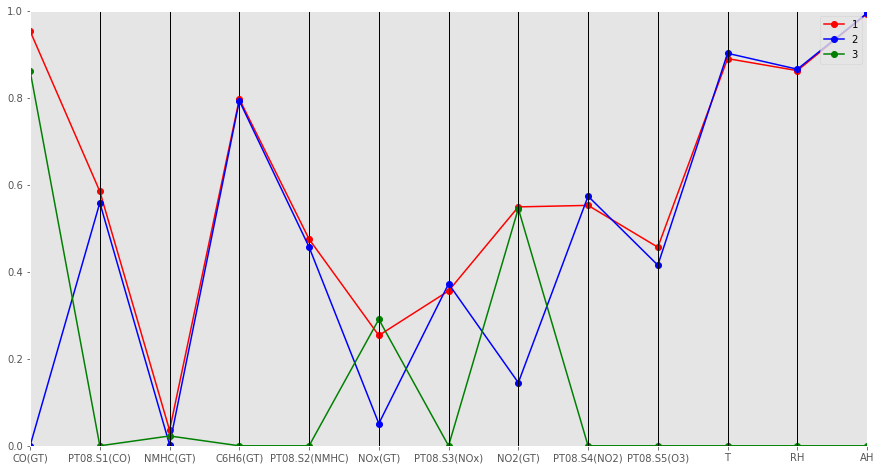

In [132]:
parallel_plot(P)

In [133]:
P

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,prediction
0,9.538920e-01,5.850807e-01,0.035836,7.974051e-01,4.752271e-01,0.253771,3.561984e-01,0.549352,5.528581e-01,4.566702e-01,8.903124e-01,8.626951e-01,9.938607e-01,1
1,1.609823e-14,5.588882e-01,0.002515,7.934174e-01,4.570347e-01,0.051093,3.724326e-01,0.145145,5.739819e-01,4.153581e-01,9.025295e-01,8.659876e-01,9.948346e-01,2
2,8.623461e-01,-2.331468e-15,0.022600,-3.330669e-16,-9.992007e-16,0.290827,-6.661338e-16,0.545487,1.332268e-15,3.330669e-16,4.440892e-16,-3.996803e-15,1.221245e-15,3


In [134]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869


In [135]:
y_means = kmeans.fit_predict(X)

In [136]:
y_means

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
ClusterSatu = X[y_means==0]
ClusterSatu

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.251980,0.803565,0.516156,0.217987,0.435657,0.579630,0.635966,0.539111,0.873262,0.862141,0.992715
1,0.953280,0.666071,0.224622,0.794084,0.478459,0.180465,0.476587,0.540741,0.591261,0.430408,0.872036,0.857984,0.992556
2,0.954224,0.715179,0.207343,0.792567,0.471831,0.197141,0.464794,0.581481,0.589916,0.467866,0.866312,0.879806,0.992678
3,0.954224,0.703571,0.201584,0.793326,0.475559,0.221560,0.448144,0.596296,0.599664,0.515241,0.862633,0.900589,0.992858
4,0.951392,0.657143,0.180706,0.783087,0.429163,0.197141,0.487340,0.585185,0.568067,0.481087,0.863451,0.899203,0.992869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.958471,0.675893,0.000000,0.809632,0.538940,0.400238,0.256330,0.722222,0.529076,0.708410,0.907195,0.794250,0.992710
9353,0.955168,0.608482,0.000000,0.801669,0.508285,0.329363,0.278876,0.701852,0.492101,0.539479,0.917007,0.774853,0.992488
9354,0.955168,0.599107,0.000000,0.805461,0.523198,0.293627,0.278529,0.694444,0.484370,0.474477,0.927637,0.756148,0.992136
9355,0.953752,0.537054,0.000000,0.794463,0.480944,0.259083,0.312869,0.659259,0.417143,0.356225,0.933361,0.739522,0.991509


In [138]:
ClusterDua = X[y_means==1]
ClusterDua

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
10,0.0,0.540625,0.154068,0.763367,0.301160,0.131626,0.699965,0.433333,0.469580,0.236871,0.858953,0.902321,0.992659
34,0.0,0.460268,0.151188,0.762609,0.292461,0.131626,0.725980,0.429630,0.448403,0.214469,0.842600,0.921025,0.992058
39,0.0,0.779018,0.000000,0.842245,0.643331,0.000000,0.335414,0.000000,0.758992,0.656629,0.855274,0.887426,0.992212
58,0.0,0.601339,0.184305,0.781949,0.422949,0.184038,0.462019,0.524074,0.541849,0.437752,0.846280,0.939037,0.992508
82,0.0,0.593750,0.184305,0.778157,0.403065,0.160810,0.461325,0.522222,0.555294,0.459420,0.867130,0.904399,0.993222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,0.0,0.532589,0.000000,0.767160,0.333057,0.169744,0.363510,0.490741,0.457143,0.353287,0.876942,0.922757,0.994367
9130,0.0,0.590179,0.000000,0.781191,0.418807,0.226921,0.291710,0.540741,0.516303,0.485494,0.883892,0.939383,0.995403
9202,0.0,0.483482,0.000000,0.763367,0.302403,0.156641,0.415193,0.455556,0.437647,0.300037,0.873671,0.928992,0.994215
9274,0.0,0.454464,0.000000,0.761471,0.278790,0.147111,0.505376,0.446296,0.369076,0.192068,0.873671,0.861794,0.992729


In [139]:
ClusterTiga = X[y_means==2]
ClusterTiga

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,0.951864,0.0,0.303816,0.0,0.0,0.178082,0.0,0.503704,0.0,0.0,0.0,0.0,0.0
525,0.952808,0.0,0.285817,0.0,0.0,0.183443,0.0,0.520370,0.0,0.0,0.0,0.0,0.0
526,0.954696,0.0,0.373650,0.0,0.0,0.197141,0.0,0.542593,0.0,0.0,0.0,0.0,0.0
701,0.953280,0.0,0.242621,0.0,0.0,0.195950,0.0,0.566667,0.0,0.0,0.0,0.0,0.0
702,0.955168,0.0,0.280058,0.0,0.0,0.210840,0.0,0.572222,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,0.974988,0.0,0.000000,0.0,0.0,0.849911,0.0,0.974074,0.0,0.0,0.0,0.0,0.0
8112,0.974516,0.0,0.000000,0.0,0.0,0.751042,0.0,0.896296,0.0,0.0,0.0,0.0,0.0
8113,0.977348,0.0,0.000000,0.0,0.0,0.759381,0.0,0.905556,0.0,0.0,0.0,0.0,0.0
8114,0.966966,0.0,0.000000,0.0,0.0,0.500893,0.0,0.768519,0.0,0.0,0.0,0.0,0.0


In [140]:
# ClusterEmpat = X[y_means==3]
# ClusterEmpat

In [141]:
ClusterSatu.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,0.953892,0.585081,0.035836,0.797405,0.475227,0.253771,0.356198,0.549352,0.552858,0.456670,0.890312,0.862695,0.993861
std,0.006779,0.097626,0.110719,0.028218,0.109972,0.135285,0.089021,0.157574,0.117763,0.148942,0.036233,0.060449,0.001977
min,0.944313,0.378125,0.000000,0.759196,0.243165,0.000000,0.181061,0.000000,0.252437,0.154609,0.809894,0.724628,0.989881
25%,0.949033,0.511607,0.000000,0.775882,0.390638,0.172722,0.294485,0.505556,0.471597,0.346952,0.863451,0.815379,0.992420
50%,0.952336,0.569196,0.000000,0.790671,0.463546,0.223943,0.345127,0.568519,0.553613,0.437018,0.886754,0.863526,0.993714
75%,0.957055,0.645536,0.000000,0.812666,0.548985,0.309708,0.402359,0.627778,0.629580,0.552699,0.914963,0.909248,0.995192
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.987037,1.000000,1.000000,1.000000,1.000000,0.999751


In [142]:
ClusterDua.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,1647.0,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000
mean,0.0,0.558888,0.002515,0.793417,0.457035,0.051093,0.372433,0.145145,0.573982,0.415358,0.902529,0.865988,0.994835
std,0.0,0.090644,0.020774,0.028178,0.111844,0.088894,0.088154,0.239525,0.108321,0.128864,0.033798,0.057798,0.001886
min,0.0,0.393304,0.000000,0.758817,0.241508,0.000000,0.187305,0.000000,0.292101,0.166361,0.811938,0.724628,0.990222
25%,0.0,0.491295,0.000000,0.772848,0.373032,0.000000,0.312175,0.000000,0.514958,0.329783,0.878168,0.825078,0.993598
50%,0.0,0.542411,0.000000,0.785741,0.442005,0.000000,0.363857,0.000000,0.572101,0.392582,0.902289,0.866990,0.994751
75%,0.0,0.604464,0.000000,0.804323,0.519263,0.132817,0.417274,0.430556,0.630588,0.482189,0.924366,0.908902,0.996315
max,0.0,0.944196,0.231821,0.932499,0.865369,0.745682,0.877905,0.751852,0.969412,0.882115,0.992641,0.994804,1.000000


In [143]:
ClusterTiga.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,366.000000,366.0,366.000000,366.0,366.0,366.000000,366.0,366.000000,366.0,366.0,366.0,366.0,366.0
mean,0.862346,0.0,0.022600,0.0,0.0,0.290827,0.0,0.545487,0.0,0.0,0.0,0.0,0.0
std,0.285316,0.0,0.083166,0.0,0.0,0.205079,0.0,0.226495,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.949033,0.0,0.000000,0.0,0.0,0.167957,0.0,0.509722,0.0,0.0,0.0,0.0,0.0
50%,0.953280,0.0,0.000000,0.0,0.0,0.245086,0.0,0.578704,0.0,0.0,0.0,0.0,0.0
75%,0.959415,0.0,0.000000,0.0,0.0,0.403961,0.0,0.674074,0.0,0.0,0.0,0.0,0.0
max,0.987730,0.0,0.512599,0.0,0.0,0.899345,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [144]:
# ClusterEmpat.describe()

In [145]:
X = np.array(X)

<function matplotlib.pyplot.show(close=None, block=None)>

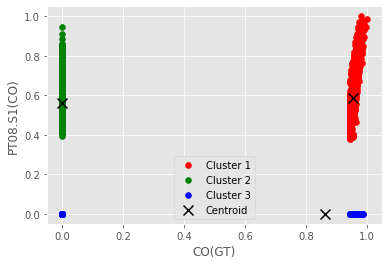

In [146]:
plt.scatter(ClusterSatu["CO(GT)"],ClusterSatu["PT08.S1(CO)"],color='red', label="Cluster 1")
plt.scatter(ClusterDua["CO(GT)"],ClusterDua["PT08.S1(CO)"],color='green', label="Cluster 2")
plt.scatter(ClusterTiga["CO(GT)"],ClusterTiga["PT08.S1(CO)"],color='blue', label="Cluster 3")
# plt.scatter(ClusterEmpat["CO(GT)"],ClusterEmpat["PT08.S1(CO)"],color='yellow', label="Cluster 4")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], color="black", s=100, marker="x", label="Centroid")
plt.xlabel('CO(GT)')
plt.ylabel('PT08.S1(CO)')

plt.legend(),
plt.show

In [147]:
# plt.figure(figsize=(10, 7))  
# plt.title("Dendrograms")  
# dend = shc.dendrogram(shc.linkage(X, method='ward'))
# plt.axhline(y=4, color='r', linestyle='--')